In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive

/content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from IPython.core.display import display, HTML


fig = plt.figure(figsize=(6,6))
ax = plt.axes(xlim=(-1.5,1.5), ylim=(-1.5,1.5))

n = 100

#  l number
#  (0)figure8, (1)butterfly I, (2)butterfly II, (3)bumblebee, (4)moth I,
#  (5)moth II, (6)butterfly III, (7)moth III, (8)goggles, (9)butterfly IV,
#  (10)dragonfly, (11)yarn, (12)yin-yang I, (13)yin-yang I, (14)yin-yang II,
#  (15)yin-yang II

a = np.float64(1.0)
b_list = np.array([0.347111, 0.30689, 0.39295, 0.18428, 0.46444,
                   0.43917, 0.40592, 0.38344, 0.08330, 0.350112,
                   0.08058, 0.55906, 0.51394, 0.28270, 0.41682,
                   0.41734], dtype = 'double')
c_list = np.array([0.532728, 0.12551, 0.09758, 0.58719, 0.39606,
                   0.45297, 0.23016, 0.37736, 0.12789, 0.07934,
                   0.58884, 0.34919, 0.30474, 0.32721, 0.33033,
                   0.31310], dtype = 'double')
l = 1
b = b_list[l]
c = c_list[l]

x=np.array([-a, a, 0], dtype = 'double')
y=np.array([0, 0, 0], dtype = 'double')
dx=np.array([b,b,-2*b], dtype = 'double')
dy=np.array([c,c,-2*c], dtype = 'double')

M=np.array([1.0,1.0,1.0], dtype = 'double')
dt=np.double(0.0001)
cx=[[],[],[]]
cy=[[],[],[]]

curve1,=ax.plot([],[],'r-')
curve2,=ax.plot([],[],'g-')
curve3,=ax.plot([],[],'b-')

obj1,=plt.plot([],[],'ro')
obj2,=plt.plot([],[],'go')
obj3,=plt.plot([],[],'bo')

def init():
    curve1.set_data([],[])
    curve2.set_data([],[])
    curve3.set_data([],[])
    obj1.set_data([],[])
    obj2.set_data([],[])
    obj3.set_data([],[])
    return curve1,curve2,curve3,obj1,obj2,obj3,

def f(t):
    global x,y,dx,dy,r,n

    for _ in range(n):
        for i in range(2):
            j=(i+1)%2
            dx[i]+=dt*M[j]*(x[j]-x[i])/((x[j]-x[i])**2+(y[j]-y[i])**2)**1.5
            dy[i]+=dt*M[j]*(y[j]-y[i])/((x[j]-x[i])**2+(y[j]-y[i])**2)**1.5

            dx[i]+=dt*M[2]*(x[2]-x[i])/((x[2]-x[i])**2+(y[2]-y[i])**2)**1.5
            dy[i]+=dt*M[2]*(y[2]-y[i])/((x[2]-x[i])**2+(y[2]-y[i])**2)**1.5

            dx[2]+=dt*M[i]*(x[i]-x[2])/((x[i]-x[2])**2+(y[i]-y[2])**2)**1.5
            dy[2]+=dt*M[i]*(y[i]-y[2])/((x[i]-x[2])**2+(y[i]-y[2])**2)**1.5

        for i in range(3):
            x[i]+=dt*dx[i]
            y[i]+=dt*dy[i]

    for i in range(3):
        cx[i].append(x[i])
        cy[i].append(y[i])
    curve1.set_data(cx[0],cy[0])
    curve2.set_data(cx[1],cy[1])
    curve3.set_data(cx[2],cy[2])
    obj1.set_data(x[0],y[0])
    obj2.set_data(x[1],y[1])
    obj3.set_data(x[2],y[2])

    return curve1, curve2, curve3, obj1, obj2, obj3,

meh = anim.FuncAnimation(fig, f, frames=300, init_func=init, interval=1, blit=True, save_count=(9000))#save_count=(9000)
plt.close()
HTML(meh.to_html5_video())

<ipython-input-50-887e002e0bf4>:89: UserWarning: You passed in an explicit save_count=9000 which is being ignored in favor of frames=300.
  meh = anim.FuncAnimation(fig, f, frames=300, init_func=init, interval=1, blit=True, save_count=(9000))#save_count=(9000)
<ipython-input-50-887e002e0bf4>:83: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  obj1.set_data(x[0],y[0])
<ipython-input-50-887e002e0bf4>:84: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  obj2.set_data(x[1],y[1])
<ipython-input-50-887e002e0bf4>:85: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  obj3.set_data(x[2],y[2])


In [ ]:
#cd /content/drive/MyDrive/

In [ ]:
import numpy as np
import torch
import os
from torch.utils.data import Dataset, random_split
torch.manual_seed(41)
torch.cuda.manual_seed(41)
torch.cuda.manual_seed_all(41)

path = '/content/drive/MyDrive/3bodyproblem/data'
file_list = os.listdir(path)
data_x_dir = [file for file in file_list if file.startswith('x')]
data_y_dir = [file for file in file_list if file.startswith('y')]

In [ ]:
data_y_dir = np.sort(data_y_dir)
data_y_dir

array(['y_0.npy', 'y_1.npy', 'y_10.npy', 'y_11.npy', 'y_12.npy',
       'y_13.npy', 'y_2.npy', 'y_3.npy', 'y_4.npy', 'y_5.npy', 'y_6.npy',
       'y_7.npy', 'y_8.npy', 'y_9.npy'], dtype='<U8')

In [ ]:
data_x_dir = np.sort(data_x_dir)
data_x_dir

array(['x_0.npy', 'x_1.npy', 'x_10.npy', 'x_11.npy', 'x_12.npy',
       'x_13.npy', 'x_2.npy', 'x_3.npy', 'x_4.npy', 'x_5.npy', 'x_6.npy',
       'x_7.npy', 'x_8.npy', 'x_9.npy'], dtype='<U8')

In [ ]:
datax = np.load(path+'/'+data_x_dir[0]) #3,777
datay = np.load(path+'/'+data_y_dir[0]) #3,777

In [ ]:
for dir in data_x_dir[1:]:
    arr = np.load(path+'/'+dir)
    datax = np.concatenate((datax, arr), axis = 1)
for dir in data_y_dir[1:]:
    arr = np.load(path+'/'+dir)
    datay = np.concatenate((datay, arr), axis = 1)

In [ ]:
class MyBaseDataset(Dataset):
    def __init__(self, x_data, y_data, targetx_data, targety_data):
        self.x_data = torch.DoubleTensor(x_data)
        self.y_data = torch.DoubleTensor(y_data)
        self.targetx_data = torch.DoubleTensor(targetx_data)
        self.targety_data = torch.DoubleTensor(targety_data)

    def __getitem__(self, index):
        return torch.stack([self.x_data[index], self.y_data[index]], dim=1), torch.stack([self.targetx_data[index], self.targety_data[index]], dim=1)

    def __len__(self):
        return len(self.x_data)

In [ ]:
x_data = []
for i in range(datax.shape[1]-10):
    x_data.append(datax[:, i:10+i])
y_data = []
for i in range(datay.shape[1]-10):
    y_data.append(datay[:, i:10+i])
targetx_data = []
for i in range(datax.shape[1]-10):
    targetx_data.append(datax[:, i+2:11+i])
targety_data = []
for i in range(datay.shape[1]-10):
    targety_data.append(datay[:, i+2:11+i])

In [ ]:
targetx_data[0]

array([[-0.98901286, -0.98509066, -0.98103501, -0.97684378, -0.97251483,
        -0.96804604, -0.96343529, -0.9586805 , -0.95377958],
       [ 1.00985825,  1.01290392,  1.01583272,  1.01864662,  1.02134757,
         1.02393744,  1.02641811,  1.0287914 ,  1.0310591 ],
       [-0.02084539, -0.02781325, -0.03479771, -0.04180285, -0.04883274,
        -0.0558914 , -0.06298282, -0.0701109 , -0.07727951]])

In [ ]:
print(len(targetx_data))
print(len(targety_data))

26100
26100


In [ ]:
dataset = MyBaseDataset(x_data, y_data, targetx_data, targety_data)
dataset[0][0].shape
len(dataset)

<ipython-input-10-78b984e4eca5>:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  self.x_data = torch.DoubleTensor(x_data)


26100

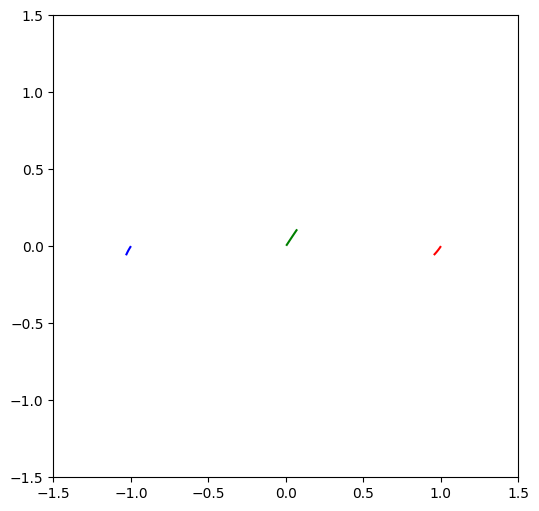

In [ ]:
import matplotlib.pyplot as plt

data = dataset[200][0].cpu().detach().numpy()

fig = plt.figure(figsize=(6,6))
ax = plt.axes(xlim=(-1.5,1.5), ylim=(-1.5,1.5))
ax.plot(data[0, 0, :], data[0, 1, :], 'r-')
ax.plot(data[1, 0, :], data[1, 1, :], 'g-')
ax.plot(data[2, 0, :], data[2, 1, :], 'b-')

In [ ]:
dataset_size = len(dataset)
train_size = int(dataset_size * 0.8)
validation_size = int(dataset_size * 0.1)
test_size = int(dataset_size * 0.1)
train_dataset, validation_dataset, test_dataset = random_split(dataset, [train_size, validation_size, test_size])


In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True, drop_last=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=1, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True, drop_last=True)

In [ ]:
pip install torch_geometric

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MessagePassing
import torch.nn as nn
import torch.nn.functional as F

edge_index = torch.tensor([[0, 1, 1, 2, 2, 0],
                           [1, 0, 2, 1, 0, 2]], dtype=torch.long)

In [ ]:
class p3bp(MessagePassing):
    def __init__(self):
        super(p3bp, self).__init__(aggr='add')
        self.hidim = 64
        self.activation = nn.Tanh()
        self.emb = nn.Sequential(nn.Linear(4, self.hidim),
                       self.activation,
                       nn.Linear(self.hidim, self.hidim))
        self.unemb = nn.Sequential(nn.Linear(self.hidim, self.hidim),
                       self.activation,
                       nn.Linear(self.hidim, 2))
        self.gru_cell = nn.GRUCell(input_size=self.hidim, hidden_size=self.hidim)
        self.mmlp = nn.Sequential(nn.Linear(self.hidim, self.hidim),
                       self.activation,
                       nn.Linear(self.hidim, self.hidim))
        self.mlp = nn.Sequential(nn.Linear(2*self.hidim, 2*self.hidim),
                       self.activation,
                       nn.Linear(2*self.hidim, 2*self.hidim),
                       self.activation,
                       nn.Linear(2*self.hidim, self.hidim))

    def forward(self, inputs, edge_index):
        inputs = inputs.double() #torch.Size([1, 3, 2, 10]) #torch.float64
        pred_all = []

        for step in range(9):
            ins = inputs[:, :, :, step:2+step]
            ins1 = ins[:,:,0].reshape(3, 2)
            ins2 = ins[:,:,1].reshape(3, 2)
            vel = (ins2-ins1).reshape(3, 2)
            vec = torch.cat((ins2, vel), 1) #torch.Size([3, 4])
            hidden = self.emb(vec) #torch.Size([3, 32])
            for k in range(1):
                hidden = hidden + self.propagate(edge_index, x=hidden, hidden=hidden)
            pred = self.unemb(hidden)#torch.Size([3, 2])
            pred_all.append(pred)

        preds = torch.stack(pred_all, dim=2) #torch.Size([3, 2, 9])
        return preds

    def generate(self, input, n):
        input = input.double()
        pred_all = []
        ins = input
        ins1 = ins[:,:,0].reshape(3, 2)
        ins2 = ins[:,:,1].reshape(3, 2)
        vel = (ins2-ins1).reshape(3, 2)
        vec = torch.cat((ins2, vel), 1) #torch.Size([3, 4])
        hidden = self.emb(vec) #torch.Size([3, 32])
        pred = ins2
        for step in range(n):
            for k in range(2):
                hidden = hidden + self.propagate(edge_index, x=hidden, hidden=hidden)
            pred = self.unemb(hidden)#torch.Size([3, 2])
            pred_all.append(pred)

        preds = torch.stack(pred_all, dim=2)
        return preds

    def message(self, x_i, x_j):
        #x_i = self.mmlp(x_i)
        #x_j = self.mmlp(x_j)
        tmp = torch.cat([x_i, x_j], dim=1)
        tmp = self.mlp(tmp)
        return tmp

    def update(self, aggr_msg, hidden):
        aggr_msg = aggr_msg.reshape(-1, self.hidim)
        #aggr_msg = self.gru_cell(aggr_msg, hidden.reshape(-1, self.hidim)) #torch.Size([3, 32])
        hidden = aggr_msg.reshape(-1, self.hidim)
        return hidden


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = p3bp().to(device).double()
#model.load_state_dict(torch.load('/content/drive/MyDrive/3bodyproblem/'+ 'model.pt'))
edge_index = edge_index.to(device)

In [ ]:
from torch.optim import lr_scheduler

optimizer = torch.optim.Adam(list(model.parameters()), lr=0.001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)
loss_func = nn.MSELoss()

In [ ]:
from tqdm import tqdm
import time

model.train()
best_val_loss = np.inf
for epoch in range(10):
    loss_train = []
    t = time.time()
    t1 = time.time()
    for iter, (x, y) in tqdm(enumerate(train_dataloader)):
        x = x.to(device)
        y = y.to(device)

        out = model(x, edge_index)

        loss = loss_func(out, y.squeeze())

        optimizer.zero_grad()

        loss.backward(retain_graph=True)
        optimizer.step()

        loss_train.append(loss.item())

        scheduler.step()

        if (iter%1000==0):
            print('Epoch: {:04d}'.format(epoch),
                  'miniepoch: {:04d}'.format(iter//1000),
                'train_loss: {:.10f}'.format(np.mean(loss_train)),
                'time: {:.4f}s'.format(time.time() - t))

    model.eval()
    loss_valid = []
    for iter, (x, y) in tqdm(enumerate(validation_dataloader)):
        x = x.to(device)
        y = y.to(device)

        out = model(x, edge_index)

        loss = loss_func(out, y.squeeze())
        loss_valid.append(loss.item())

        optimizer.zero_grad()

    print('Epoch: {:04d}'.format(epoch),
            'train_loss: {:.10f}'.format(np.mean(loss_train)),
            'val_loss: {:.10f}'.format(np.mean(loss_valid)),
            'time: {:.4f}s'.format(time.time() - t))
    torch.save(model.state_dict(), '/content/drive/MyDrive/3bodyproblem/'+str(epoch)+ 'model.pt')


4it [00:00, 31.05it/s]

Epoch: 0000 miniepoch: 0000 train_loss: 0.3812715354 time: 0.0454s


1010it [00:18, 49.78it/s]

Epoch: 0000 miniepoch: 0001 train_loss: 0.0058686272 time: 18.0679s


2008it [00:35, 48.80it/s]

Epoch: 0000 miniepoch: 0002 train_loss: 0.0047786867 time: 35.6787s


3005it [00:53, 43.55it/s]

Epoch: 0000 miniepoch: 0003 train_loss: 0.0043784834 time: 53.1905s


4012it [01:10, 62.63it/s]

Epoch: 0000 miniepoch: 0004 train_loss: 0.0042176421 time: 70.6429s


5014it [01:28, 66.09it/s]

Epoch: 0000 miniepoch: 0005 train_loss: 0.0041419497 time: 87.9111s


6012it [01:45, 65.45it/s]

Epoch: 0000 miniepoch: 0006 train_loss: 0.0040641535 time: 105.0978s


7006it [02:03, 47.98it/s]

Epoch: 0000 miniepoch: 0007 train_loss: 0.0040049122 time: 123.6307s


8014it [02:21, 65.40it/s]

Epoch: 0000 miniepoch: 0008 train_loss: 0.0039662314 time: 141.2819s


9011it [02:38, 65.28it/s]

Epoch: 0000 miniepoch: 0009 train_loss: 0.0039324003 time: 158.4976s


10008it [02:55, 63.34it/s]

Epoch: 0000 miniepoch: 0010 train_loss: 0.0039235129 time: 175.6550s


11006it [03:13, 48.75it/s]

Epoch: 0000 miniepoch: 0011 train_loss: 0.0038616164 time: 193.1434s


12006it [03:31, 46.46it/s]

Epoch: 0000 miniepoch: 0012 train_loss: 0.0038320200 time: 211.0442s


13009it [03:48, 46.58it/s]

Epoch: 0000 miniepoch: 0013 train_loss: 0.0038227574 time: 228.6124s


14010it [04:06, 41.90it/s]

Epoch: 0000 miniepoch: 0014 train_loss: 0.0037996412 time: 246.5676s


15012it [04:25, 63.39it/s]

Epoch: 0000 miniepoch: 0015 train_loss: 0.0037964203 time: 265.3727s


16014it [04:42, 65.30it/s]

Epoch: 0000 miniepoch: 0016 train_loss: 0.0037618646 time: 282.6442s


17012it [04:59, 64.68it/s]

Epoch: 0000 miniepoch: 0017 train_loss: 0.0037356634 time: 299.8073s


18010it [05:17, 63.88it/s]

Epoch: 0000 miniepoch: 0018 train_loss: 0.0037224477 time: 317.0449s


19013it [05:34, 64.19it/s]

Epoch: 0000 miniepoch: 0019 train_loss: 0.0037091864 time: 334.2244s


20010it [05:51, 66.21it/s]

Epoch: 0000 miniepoch: 0020 train_loss: 0.0037021485 time: 351.2976s


20880it [06:06, 56.97it/s]
2610it [00:23, 108.80it/s]


Epoch: 0000 train_loss: 0.0036960212 val_loss: 0.0033857871 time: 390.5052s


6it [00:00, 57.26it/s]

Epoch: 0001 miniepoch: 0000 train_loss: 0.0011143843 time: 0.0269s


1014it [00:17, 64.14it/s]

Epoch: 0001 miniepoch: 0001 train_loss: 0.0032794228 time: 17.2230s


2011it [00:34, 64.54it/s]

Epoch: 0001 miniepoch: 0002 train_loss: 0.0034168507 time: 34.5663s


3011it [00:51, 63.09it/s]

Epoch: 0001 miniepoch: 0003 train_loss: 0.0036773710 time: 51.7533s


4009it [01:09, 65.71it/s]

Epoch: 0001 miniepoch: 0004 train_loss: 0.0036319011 time: 68.9130s


5011it [01:27, 64.69it/s]

Epoch: 0001 miniepoch: 0005 train_loss: 0.0036092173 time: 87.7048s


6009it [01:45, 64.04it/s]

Epoch: 0001 miniepoch: 0006 train_loss: 0.0035876434 time: 105.0489s


7007it [02:02, 45.16it/s]

Epoch: 0001 miniepoch: 0007 train_loss: 0.0036303168 time: 122.5826s


8006it [02:20, 45.93it/s]

Epoch: 0001 miniepoch: 0008 train_loss: 0.0036002482 time: 140.2877s


9008it [02:37, 48.27it/s]

Epoch: 0001 miniepoch: 0009 train_loss: 0.0035573975 time: 157.6981s


10007it [02:55, 40.61it/s]

Epoch: 0001 miniepoch: 0010 train_loss: 0.0035379305 time: 175.3995s


11013it [03:13, 61.72it/s]

Epoch: 0001 miniepoch: 0011 train_loss: 0.0035081390 time: 192.9202s


12011it [03:30, 62.40it/s]

Epoch: 0001 miniepoch: 0012 train_loss: 0.0035179123 time: 210.1937s


13010it [03:50, 64.80it/s]

Epoch: 0001 miniepoch: 0013 train_loss: 0.0035248464 time: 230.1650s


14009it [04:07, 64.60it/s]

Epoch: 0001 miniepoch: 0014 train_loss: 0.0035584482 time: 247.3237s


15014it [04:24, 64.85it/s]

Epoch: 0001 miniepoch: 0015 train_loss: 0.0035671450 time: 264.6082s


16012it [04:42, 64.49it/s]

Epoch: 0001 miniepoch: 0016 train_loss: 0.0035816114 time: 281.9437s


17012it [04:59, 65.76it/s]

Epoch: 0001 miniepoch: 0017 train_loss: 0.0035953005 time: 299.0902s


18011it [05:16, 63.85it/s]

Epoch: 0001 miniepoch: 0018 train_loss: 0.0035979063 time: 316.2085s


19009it [05:33, 49.00it/s]

Epoch: 0001 miniepoch: 0019 train_loss: 0.0035922517 time: 333.5088s


20009it [05:51, 45.44it/s]

Epoch: 0001 miniepoch: 0020 train_loss: 0.0035736937 time: 351.4269s


20880it [06:06, 56.95it/s]
2610it [00:23, 110.51it/s]


Epoch: 0001 train_loss: 0.0035777841 val_loss: 0.0033857871 time: 390.2776s


7it [00:00, 63.86it/s]

Epoch: 0002 miniepoch: 0000 train_loss: 0.0029380131 time: 0.0238s


1009it [00:17, 65.43it/s]

Epoch: 0002 miniepoch: 0001 train_loss: 0.0034096684 time: 17.1547s


2010it [00:34, 58.58it/s]

Epoch: 0002 miniepoch: 0002 train_loss: 0.0034078018 time: 34.3116s


3008it [00:53, 63.29it/s]

Epoch: 0002 miniepoch: 0003 train_loss: 0.0034102605 time: 53.8403s


4013it [01:11, 65.78it/s]

Epoch: 0002 miniepoch: 0004 train_loss: 0.0034221745 time: 70.9915s


5008it [01:28, 60.18it/s]

Epoch: 0002 miniepoch: 0005 train_loss: 0.0034400409 time: 88.0455s


6013it [01:45, 63.55it/s]

Epoch: 0002 miniepoch: 0006 train_loss: 0.0035279157 time: 105.1835s


7010it [02:02, 47.68it/s]

Epoch: 0002 miniepoch: 0007 train_loss: 0.0035581123 time: 122.6497s


8009it [02:20, 46.12it/s]

Epoch: 0002 miniepoch: 0008 train_loss: 0.0035714039 time: 140.2237s


9008it [02:37, 47.81it/s]

Epoch: 0002 miniepoch: 0009 train_loss: 0.0035854436 time: 157.6509s


10007it [02:55, 46.41it/s]

Epoch: 0002 miniepoch: 0010 train_loss: 0.0036144921 time: 175.1641s


11010it [03:12, 61.24it/s]

Epoch: 0002 miniepoch: 0011 train_loss: 0.0036212684 time: 192.5536s


12010it [03:31, 65.36it/s]

Epoch: 0002 miniepoch: 0012 train_loss: 0.0035955964 time: 211.4719s


13012it [03:48, 63.55it/s]

Epoch: 0002 miniepoch: 0013 train_loss: 0.0036102237 time: 228.6534s


14008it [04:05, 65.02it/s]

Epoch: 0002 miniepoch: 0014 train_loss: 0.0036087573 time: 245.6516s


15014it [04:23, 65.34it/s]

Epoch: 0002 miniepoch: 0015 train_loss: 0.0036008757 time: 262.8979s


16014it [04:40, 63.16it/s]

Epoch: 0002 miniepoch: 0016 train_loss: 0.0035671908 time: 280.0072s


17012it [04:57, 65.22it/s]

Epoch: 0002 miniepoch: 0017 train_loss: 0.0035803134 time: 297.0749s


18006it [05:14, 48.42it/s]

Epoch: 0002 miniepoch: 0018 train_loss: 0.0035762319 time: 314.3028s


19008it [05:32, 46.47it/s]

Epoch: 0002 miniepoch: 0019 train_loss: 0.0035821117 time: 331.9175s


20008it [05:49, 47.30it/s]

Epoch: 0002 miniepoch: 0020 train_loss: 0.0035830194 time: 349.4029s


20880it [06:04, 57.30it/s]
2610it [00:23, 111.85it/s]


Epoch: 0002 train_loss: 0.0035777841 val_loss: 0.0033857871 time: 387.7589s


6it [00:00, 58.75it/s]

Epoch: 0003 miniepoch: 0000 train_loss: 0.0053595862 time: 0.0265s


1006it [00:18, 40.55it/s]

Epoch: 0003 miniepoch: 0001 train_loss: 0.0038654265 time: 18.7488s


2010it [00:36, 65.48it/s]

Epoch: 0003 miniepoch: 0002 train_loss: 0.0035312900 time: 35.9940s


3014it [00:53, 65.42it/s]

Epoch: 0003 miniepoch: 0003 train_loss: 0.0035500928 time: 53.2267s


4008it [01:10, 48.31it/s]

Epoch: 0003 miniepoch: 0004 train_loss: 0.0035454550 time: 70.7466s


5009it [01:28, 48.26it/s]

Epoch: 0003 miniepoch: 0005 train_loss: 0.0035727784 time: 88.2014s


6010it [01:45, 47.29it/s]

Epoch: 0003 miniepoch: 0006 train_loss: 0.0035693979 time: 105.7186s


7006it [02:03, 40.51it/s]

Epoch: 0003 miniepoch: 0007 train_loss: 0.0035528181 time: 123.2965s


8013it [02:20, 64.25it/s]

Epoch: 0003 miniepoch: 0008 train_loss: 0.0035733206 time: 140.5205s


9011it [02:37, 63.45it/s]

Epoch: 0003 miniepoch: 0009 train_loss: 0.0035895144 time: 157.7141s


10012it [02:55, 63.99it/s]

Epoch: 0003 miniepoch: 0010 train_loss: 0.0036222865 time: 175.0667s


11011it [03:13, 64.75it/s]

Epoch: 0003 miniepoch: 0011 train_loss: 0.0036204736 time: 193.8371s


12011it [03:30, 63.57it/s]

Epoch: 0003 miniepoch: 0012 train_loss: 0.0036005959 time: 210.8227s


13011it [03:48, 63.89it/s]

Epoch: 0003 miniepoch: 0013 train_loss: 0.0036194140 time: 227.9010s


14012it [04:05, 63.10it/s]

Epoch: 0003 miniepoch: 0014 train_loss: 0.0036130451 time: 244.9495s


15006it [04:22, 49.52it/s]

Epoch: 0003 miniepoch: 0015 train_loss: 0.0036050087 time: 262.1813s


16009it [04:39, 49.70it/s]

Epoch: 0003 miniepoch: 0016 train_loss: 0.0035869730 time: 279.5688s


17008it [04:57, 49.37it/s]

Epoch: 0003 miniepoch: 0017 train_loss: 0.0035794080 time: 297.0908s


18007it [05:14, 46.34it/s]

Epoch: 0003 miniepoch: 0018 train_loss: 0.0035769656 time: 314.6867s


19011it [05:32, 60.39it/s]

Epoch: 0003 miniepoch: 0019 train_loss: 0.0035670115 time: 331.9766s


20012it [05:49, 63.65it/s]

Epoch: 0003 miniepoch: 0020 train_loss: 0.0035819433 time: 349.3008s


20880it [06:04, 57.23it/s]
2610it [00:24, 107.86it/s]


Epoch: 0003 train_loss: 0.0035777841 val_loss: 0.0033857871 time: 389.0875s


14it [00:00, 65.30it/s]

Epoch: 0004 miniepoch: 0000 train_loss: 0.0097653367 time: 0.0204s


1013it [00:17, 66.49it/s]

Epoch: 0004 miniepoch: 0001 train_loss: 0.0038469142 time: 17.1826s


2013it [00:34, 65.36it/s]

Epoch: 0004 miniepoch: 0002 train_loss: 0.0037870257 time: 34.3832s


3010it [00:51, 59.03it/s]

Epoch: 0004 miniepoch: 0003 train_loss: 0.0036305456 time: 51.5522s


4009it [01:08, 48.07it/s]

Epoch: 0004 miniepoch: 0004 train_loss: 0.0035907921 time: 68.7350s


5010it [01:26, 47.00it/s]

Epoch: 0004 miniepoch: 0005 train_loss: 0.0035258220 time: 86.4570s


6010it [01:44, 48.93it/s]

Epoch: 0004 miniepoch: 0006 train_loss: 0.0034866927 time: 103.8313s


7010it [02:01, 46.02it/s]

Epoch: 0004 miniepoch: 0007 train_loss: 0.0035315244 time: 121.2129s


8009it [02:18, 59.71it/s]

Epoch: 0004 miniepoch: 0008 train_loss: 0.0035572205 time: 138.6507s


9010it [02:36, 49.33it/s]

Epoch: 0004 miniepoch: 0009 train_loss: 0.0035807410 time: 156.2369s


10014it [02:55, 65.28it/s]

Epoch: 0004 miniepoch: 0010 train_loss: 0.0036115955 time: 175.0110s


11009it [03:12, 64.40it/s]

Epoch: 0004 miniepoch: 0011 train_loss: 0.0035954862 time: 192.0051s


12009it [03:29, 65.14it/s]

Epoch: 0004 miniepoch: 0012 train_loss: 0.0036157582 time: 209.0997s


13007it [03:46, 64.29it/s]

Epoch: 0004 miniepoch: 0013 train_loss: 0.0036347989 time: 226.1276s


14011it [04:03, 65.07it/s]

Epoch: 0004 miniepoch: 0014 train_loss: 0.0036424617 time: 243.3408s


15005it [04:20, 49.72it/s]

Epoch: 0004 miniepoch: 0015 train_loss: 0.0036488584 time: 260.5933s


16005it [04:38, 47.19it/s]

Epoch: 0004 miniepoch: 0016 train_loss: 0.0036431825 time: 278.3693s


17008it [04:56, 47.84it/s]

Epoch: 0004 miniepoch: 0017 train_loss: 0.0036169697 time: 296.0647s


18008it [05:13, 45.64it/s]

Epoch: 0004 miniepoch: 0018 train_loss: 0.0036168956 time: 313.6162s


19012it [05:31, 62.10it/s]

Epoch: 0004 miniepoch: 0019 train_loss: 0.0035995226 time: 331.1213s


20005it [05:48, 48.00it/s]

Epoch: 0004 miniepoch: 0020 train_loss: 0.0035879785 time: 348.4949s


20880it [06:05, 57.15it/s]
2610it [00:22, 117.59it/s]


Epoch: 0004 train_loss: 0.0035777841 val_loss: 0.0033857871 time: 387.5484s


6it [00:00, 59.79it/s]

Epoch: 0005 miniepoch: 0000 train_loss: 0.0009174655 time: 0.0214s


1008it [00:17, 48.34it/s]

Epoch: 0005 miniepoch: 0001 train_loss: 0.0036108045 time: 17.6389s


2009it [00:35, 46.80it/s]

Epoch: 0005 miniepoch: 0002 train_loss: 0.0036720183 time: 35.1534s


3006it [00:52, 47.85it/s]

Epoch: 0005 miniepoch: 0003 train_loss: 0.0036940154 time: 52.6121s


4012it [01:10, 57.67it/s]

Epoch: 0005 miniepoch: 0004 train_loss: 0.0036547554 time: 70.3198s


5008it [01:27, 64.92it/s]

Epoch: 0005 miniepoch: 0005 train_loss: 0.0036084935 time: 87.5210s


6011it [01:44, 66.13it/s]

Epoch: 0005 miniepoch: 0006 train_loss: 0.0035831586 time: 104.8310s


7011it [02:02, 64.23it/s]

Epoch: 0005 miniepoch: 0007 train_loss: 0.0035370426 time: 121.9095s


8010it [02:19, 64.69it/s]

Epoch: 0005 miniepoch: 0008 train_loss: 0.0035326598 time: 138.9813s


9010it [02:38, 66.02it/s]

Epoch: 0005 miniepoch: 0009 train_loss: 0.0035522969 time: 158.7887s


10014it [02:56, 64.66it/s]

Epoch: 0005 miniepoch: 0010 train_loss: 0.0035448766 time: 175.9535s


11011it [03:13, 63.09it/s]

Epoch: 0005 miniepoch: 0011 train_loss: 0.0035370282 time: 193.2639s


12011it [03:30, 63.99it/s]

Epoch: 0005 miniepoch: 0012 train_loss: 0.0035383573 time: 210.3043s


13010it [03:47, 65.60it/s]

Epoch: 0005 miniepoch: 0013 train_loss: 0.0035478635 time: 227.3890s


14009it [04:05, 47.25it/s]

Epoch: 0005 miniepoch: 0014 train_loss: 0.0035562058 time: 245.0884s


15009it [04:22, 47.29it/s]

Epoch: 0005 miniepoch: 0015 train_loss: 0.0035760974 time: 262.8333s


16009it [04:40, 48.21it/s]

Epoch: 0005 miniepoch: 0016 train_loss: 0.0035766947 time: 280.5196s


17013it [04:58, 54.77it/s]

Epoch: 0005 miniepoch: 0017 train_loss: 0.0035809487 time: 298.0495s


18010it [05:15, 64.40it/s]

Epoch: 0005 miniepoch: 0018 train_loss: 0.0035570642 time: 315.1918s


19009it [05:34, 64.32it/s]

Epoch: 0005 miniepoch: 0019 train_loss: 0.0035569765 time: 334.6198s


20010it [05:51, 64.34it/s]

Epoch: 0005 miniepoch: 0020 train_loss: 0.0035710574 time: 351.7468s


20880it [06:07, 56.89it/s]
2610it [00:22, 117.72it/s]


Epoch: 0005 train_loss: 0.0035777841 val_loss: 0.0033857871 time: 389.1914s


14it [00:00, 64.81it/s]

Epoch: 0006 miniepoch: 0000 train_loss: 0.0007810000 time: 0.0248s


1009it [00:17, 49.85it/s]

Epoch: 0006 miniepoch: 0001 train_loss: 0.0038233123 time: 17.3527s


2010it [00:34, 48.56it/s]

Epoch: 0006 miniepoch: 0002 train_loss: 0.0035395270 time: 34.7087s


3011it [00:52, 49.19it/s]

Epoch: 0006 miniepoch: 0003 train_loss: 0.0034712774 time: 52.2826s


4010it [01:09, 48.76it/s]

Epoch: 0006 miniepoch: 0004 train_loss: 0.0035289883 time: 69.7208s


5013it [01:27, 59.93it/s]

Epoch: 0006 miniepoch: 0005 train_loss: 0.0035724751 time: 87.4058s


6011it [01:44, 63.80it/s]

Epoch: 0006 miniepoch: 0006 train_loss: 0.0035813183 time: 104.6138s


7012it [02:02, 64.60it/s]

Epoch: 0006 miniepoch: 0007 train_loss: 0.0035547346 time: 122.0013s


8008it [02:21, 64.66it/s]

Epoch: 0006 miniepoch: 0008 train_loss: 0.0035686666 time: 141.8323s


9012it [02:39, 64.60it/s]

Epoch: 0006 miniepoch: 0009 train_loss: 0.0035752349 time: 159.0014s


9320it [02:43, 64.43it/s]

In [ ]:
#torch.save(model.state_dict(), '/content/drive/MyDrive/3bodyproblem/'+ 'model.pt')

In [ ]:
model = p3bp().to(device).double()
model.load_state_dict(torch.load('/content/drive/MyDrive/3bodyproblem/'+ '2model.pt'))

<All keys matched successfully>

In [ ]:
x1=np.array([cx[0][0], cx[1][0], cx[2][0]], dtype = 'double')
x2=np.array([cx[0][1], cx[1][1], cx[2][1]], dtype = 'double')
y1=np.array([cx[0][0], cx[1][0], cx[2][0]], dtype = 'double')
y2=np.array([cx[0][1], cx[1][1], cx[2][1]], dtype = 'double')


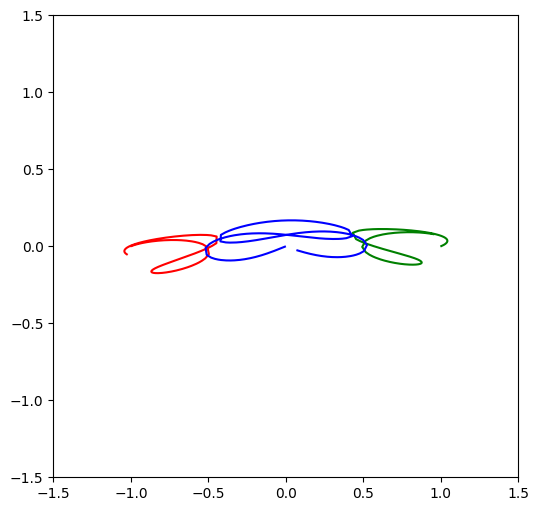

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes(xlim=(-1.5,1.5), ylim=(-1.5,1.5))
ax.plot(cx[0][:], cy[0][:], 'r-')
ax.plot(cx[1][:], cy[1][:], 'g-')
ax.plot(cx[2][:], cy[2][:], 'b-')

In [ ]:
x_con=np.stack((x1, x2), axis=-1)
y_con=np.stack((y1, y2), axis=-1)
input = np.stack((x_con, y_con), axis=1)
input_t = torch.FloatTensor(input).to(device)
input_t.shape

torch.Size([3, 2, 2])

In [ ]:
# for x, y in train_dataloader:
#   data = x.to(device)
#   break;

#input = data[:, :, :, :2]
model.eval()
datas = model.generate(input_t, 5000)
datas_np = datas.cpu().detach().numpy()
datas_np.shape

(3, 2, 5000)

In [ ]:
data = np.concatenate((input, datas_np), axis=-1)

In [ ]:
data[:, :, :2]

array([[[-0.04607996, -0.05444727],
        [-0.04607996, -0.05444727]],

       [[-0.2405838 , -0.16927678],
        [-0.2405838 , -0.16927678]],

       [[ 0.22351871,  0.14463563],
        [ 0.22351871,  0.14463563]]])

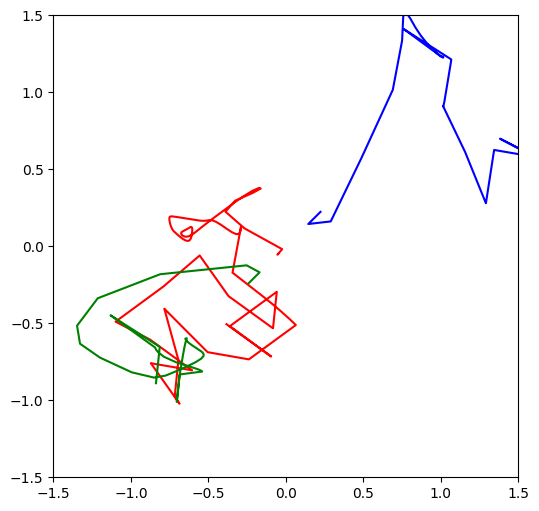

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6))
ax = plt.axes(xlim=(-1.5,1.5), ylim=(-1.5,1.5))
ax.plot(data[0, 0, :], data[0, 1, :], 'r-')
ax.plot(data[1, 0, :], data[1, 1, :], 'g-')
ax.plot(data[2, 0, :], data[2, 1, :], 'b-')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

fig = plt.figure(figsize=(6,6))
ax = plt.axes(xlim=(-1.5,1.5), ylim=(-1.5,1.5))

n = 1

#  l number
#  (0)figure8, (1)butterfly I, (2)butterfly II, (3)bumblebee, (4)moth I,
#  (5)moth II, (6)butterfly III, (7)moth III, (8)goggles, (9)butterfly IV,
#  (10)dragonfly, (11)yarn, (12)yin-yang I, (13)yin-yang I, (14)yin-yang II,
#  (15)yin-yang II

a = np.float64(1.0)
b_list = np.array([0.347111, 0.30689, 0.39295, 0.18428, 0.46444,
                   0.43917, 0.40592, 0.38344, 0.08330, 0.350112,
                   0.08058, 0.55906, 0.51394, 0.28270, 0.41682,
                   0.41734], dtype = 'double')
c_list = np.array([0.532728, 0.12551, 0.09758, 0.58719, 0.39606,
                   0.45297, 0.23016, 0.37736, 0.12789, 0.07934,
                   0.58884, 0.34919, 0.30474, 0.32721, 0.33033,
                   0.31310], dtype = 'double')
l = 0
b = b_list[l]
c = c_list[l]

x=np.array([-a, a, 0], dtype = 'double')
y=np.array([0, 0, 0], dtype = 'double')
dx=np.array([b,b,-2*b], dtype = 'double')
dy=np.array([c,c,-2*c], dtype = 'double')

model.eval()

M=np.array([1.0,1.0,1.0], dtype = 'double')
dt=np.double(0.0001)
cx=[[],[],[]]
cy=[[],[],[]]

curve1,=ax.plot([],[],'r-')
curve2,=ax.plot([],[],'g-')
curve3,=ax.plot([],[],'b-')

obj1,=plt.plot([],[],'ro')
obj2,=plt.plot([],[],'go')
obj3,=plt.plot([],[],'bo')

def init():
    curve1.set_data([],[])
    curve2.set_data([],[])
    curve3.set_data([],[])
    obj1.set_data([],[])
    obj2.set_data([],[])
    obj3.set_data([],[])
    return curve1,curve2,curve3,obj1,obj2,obj3,

def f(t):
    global input_t, datas_np

    #print(input_t.shape)
    for _ in range(n):
        datas = model.generate(input_t, 1)

    datas_np = datas.squeeze().cpu().detach().numpy()

    for i in range(3):
        cx[i].append(datas_np[i][0])
        cy[i].append(datas_np[i][1])

    #print(input_t)
    #print(datas.shape)
    input = np.stack((input_t[:,:,1].cpu().detach().numpy(), datas_np), axis=1)
    input_t = torch.FloatTensor(input).to(device)

    curve1.set_data(cx[0],cy[0])
    curve2.set_data(cx[1],cy[1])
    curve3.set_data(cx[2],cy[2])
    obj1.set_data(datas_np[0][0],datas_np[0][0])
    obj2.set_data(datas_np[1][0],datas_np[1][0])
    obj3.set_data(datas_np[2][0],datas_np[2][0])

    return curve1, curve2, curve3, obj1, obj2, obj3,

meh = anim.FuncAnimation(fig, f, frames=300, init_func=init, interval=1, blit=True, save_count=(9000))#save_count=(9000)
plt.close()
HTML(meh.to_html5_video())

<ipython-input-33-9a1c98868bcd>:90: UserWarning: You passed in an explicit save_count=9000 which is being ignored in favor of frames=300.
  meh = anim.FuncAnimation(fig, f, frames=300, init_func=init, interval=1, blit=True, save_count=(9000))#save_count=(9000)
<ipython-input-33-9a1c98868bcd>:84: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  obj1.set_data(datas_np[0][0],datas_np[0][0])
<ipython-input-33-9a1c98868bcd>:85: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  obj2.set_data(datas_np[1][0],datas_np[1][0])
<ipython-input-33-9a1c98868bcd>:86: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  obj3.set_data(datas_np[2][0],datas_np[2][0])


CalledProcessError: ignored